In [2]:
from astropy.io import fits
import os
from pathlib import Path
import random
import pandas as pd

In [18]:
DES_DIR = Path(
    "/nfs/turbo/lsa-regier/scratch/gapatron/desdr-server.ncsa.illinois.edu/despublic/dr2_tiles/"
)
DES_SUBDIRS = os.listdir(DES_DIR)
tile_choice = random.choice(DES_SUBDIRS)
main_path = DES_DIR / Path(tile_choice) / Path(f"{tile_choice}_dr2_main.fits")
mag_path = DES_DIR / Path(tile_choice) / Path(f"{tile_choice}_dr2_magnitude.fits")
main_data = fits.getdata(main_path)
main_df = pd.DataFrame(main_data)
mag_data = fits.getdata(mag_path)
mag_df = pd.DataFrame(mag_data)
full_df = pd.merge(
    main_df, mag_df, left_on="COADD_OBJECT_ID", right_on="COADD_OBJECT_ID", how="left"
)

In [19]:
full_df

,COADD_OBJECT_ID,TILENAME_x,HPIX_32_x,HPIX_64_x,HPIX_1024_x,HPIX_4096_x,HPIX_16384_x,RA_x,DEC_x,ALPHAWIN_J2000_x,...,WAVG_MAG_PSF_G_y,WAVG_MAG_PSF_R_y,WAVG_MAG_PSF_I_y,WAVG_MAG_PSF_Z_y,WAVG_MAG_PSF_Y_y,WAVG_MAGERR_PSF_G_y,WAVG_MAGERR_PSF_R_y,WAVG_MAGERR_PSF_I_y,WAVG_MAGERR_PSF_Z_y,WAVG_MAGERR_PSF_Y_y
0,1181358267,DES0131-1958,8959,35839,9174990,146799847,2348797553,22.479276,-19.863452,22.479276,...,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000
1,1181357038,DES0131-1958,8959,35839,9174990,146799847,2348797567,22.479284,-19.850598,22.479284,...,-99.000000,23.979307,-99.000000,-99.000000,-99.000000,-99.000000,0.238972,-99.000000,-99.000000,-99.000000
2,1181352173,DES0131-1958,8959,35839,9175013,146800212,2348803404,22.479295,-19.794809,22.479295,...,-99.000000,24.014517,-99.000000,-99.000000,-99.000000,-99.000000,0.230329,-99.000000,-99.000000,-99.000000
3,1181361349,DES0131-1958,8959,35839,9174988,146799819,2348797116,22.479309,-19.894490,22.479309,...,-99.000000,23.784971,23.263527,22.655447,-99.000000,-99.000000,0.205722,0.083870,0.122193,-99.000000
4,1181402033,DES0131-1958,8959,35839,9174835,146797368,2348757888,22.479318,-20.320617,22.479318,...,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65569,1181347785,DES0131-1958,9130,36522,9349680,149594885,2393518166,23.238629,-19.747851,23.238629,...,24.379965,-99.000000,-99.000000,-99.000000,-99.000000,0.238297,-99.000000,-99.000000,-99.000000,-99.000000
65570,1181339389,DES0131-1958,9130,36522,9349686,149594978,2393519649,23.238634,-19.655495,23.238634,...,23.360407,21.768230,20.173018,19.475510,19.319960,0.045760,0.014276,0.005218,0.005257,0.014066
65571,1181397354,DES0131-1958,8959,35837,9174518,146792291,2348676666,23.238659,-20.274942,23.238659,...,23.552252,22.180168,21.166012,20.692654,20.597515,0.072384,0.014547,0.010262,0.014277,0.069198
65572,1181353445,DES0131-1958,9130,36522,9349658,149594530,2393512481,23.238746,-19.810435,23.238746,...,-99.000000,23.922306,-99.000000,-99.000000,-99.000000,-99.000000,0.243725,-99.000000,-99.000000,-99.000000


In [23]:
from bliss.catalog import convert_mag_to_nmgy

fluxes = 1000 * convert_mag_to_nmgy(full_df["MAG_AUTO_G_x"])

In [50]:
fluxes

0         42.707695
1        146.309242
2         69.686892
3         55.257691
4         90.200901
            ...    
65569    102.286668
65570    438.848025
65571    855.499374
65572    291.178560
65573     99.564054
Name: MAG_AUTO_G_x, Length: 65574, dtype: float64

In [51]:
full_df["FLUX_AUTO_G"]

0         42.707706
1        146.309265
2         69.686874
3         55.257717
4         90.200836
            ...    
65569    102.286613
65570    438.848022
65571    855.498657
65572    291.178711
65573     99.564018
Name: FLUX_AUTO_G, Length: 65574, dtype: float64

In [58]:
bad_idx = np.abs(full_df["FLUX_AUTO_G"] - fluxes) > 1
fluxes[bad_idx]

67       2.511886e-28
132      2.511886e-28
136      2.511886e-28
153      2.511886e-28
168      2.511886e-28
             ...     
65324    2.511886e-28
65333    2.511886e-28
65447    2.511886e-28
65490    2.511886e-28
65512    2.511886e-28
Name: MAG_AUTO_G_x, Length: 1706, dtype: float64

In [7]:
from astropy.visualization import make_lupton_rgb
from astropy.io import fits
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

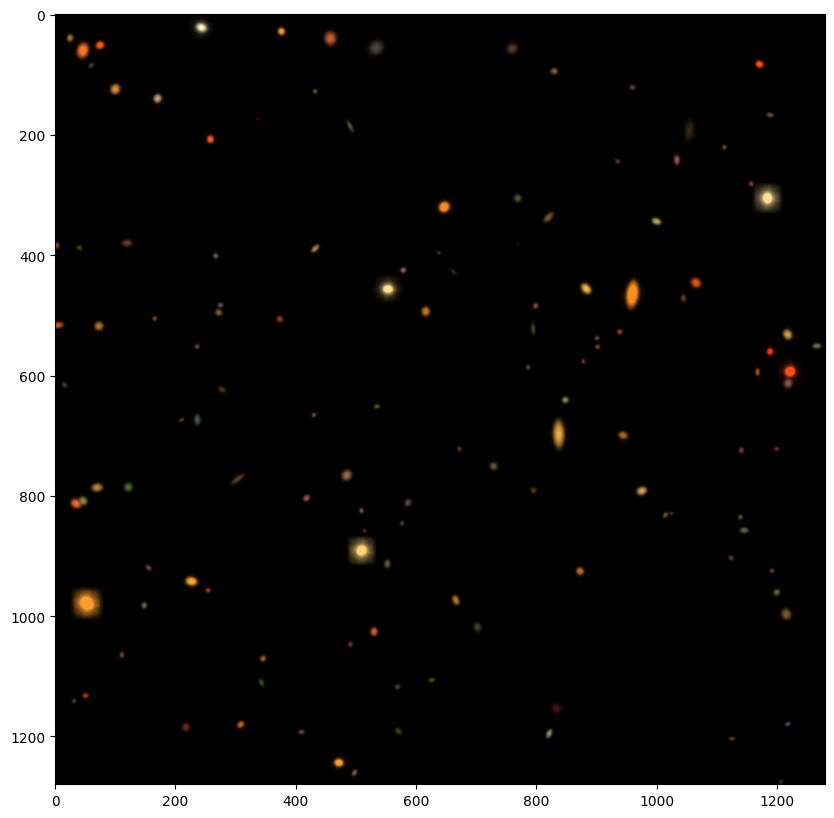

In [57]:
image_g = fits.getdata("/home/kapnadak/bliss/case_studies/galaxy_clustering/data/images/galsim_des_009_g.fits")
image_r = fits.getdata("/home/kapnadak/bliss/case_studies/galaxy_clustering/data/images/galsim_des_009_r.fits")
image_i = fits.getdata("/home/kapnadak/bliss/case_studies/galaxy_clustering/data/images/galsim_des_009_i.fits")

rgb_default = make_lupton_rgb(image_i, image_r, image_g)
plt.figure(figsize=(10,10))
plt.imshow(rgb_default)

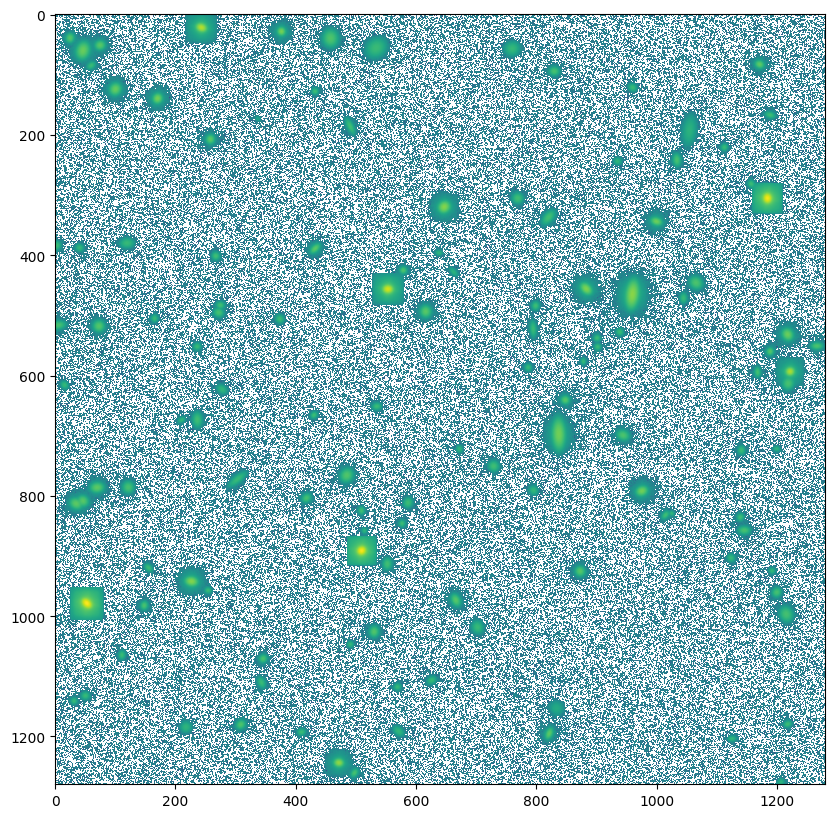

In [58]:
plt.figure(figsize=(10,10))
plt.imshow(image_r, norm=LogNorm())

In [3]:
DES_DIR = Path(
    "/nfs/turbo/lsa-regier/scratch/gapatron/desdr-server.ncsa.illinois.edu/despublic/dr2_tiles/"
)
DES_SUBDIR = os.listdir(DES_DIR)[0]
DES_SUBDIR

'DES0053-2041'

In [5]:
image_r = fits.getdata(DES_DIR / Path(DES_SUBDIR) / "DES0053-2041_r4907p02_r_nobkg.fits.fz")
image_g = fits.getdata(DES_DIR / Path(DES_SUBDIR) / "DES0053-2041_r4907p02_g_nobkg.fits.fz")
image_i = fits.getdata(DES_DIR / Path(DES_SUBDIR) / "DES0053-2041_r4907p02_i_nobkg.fits.fz")

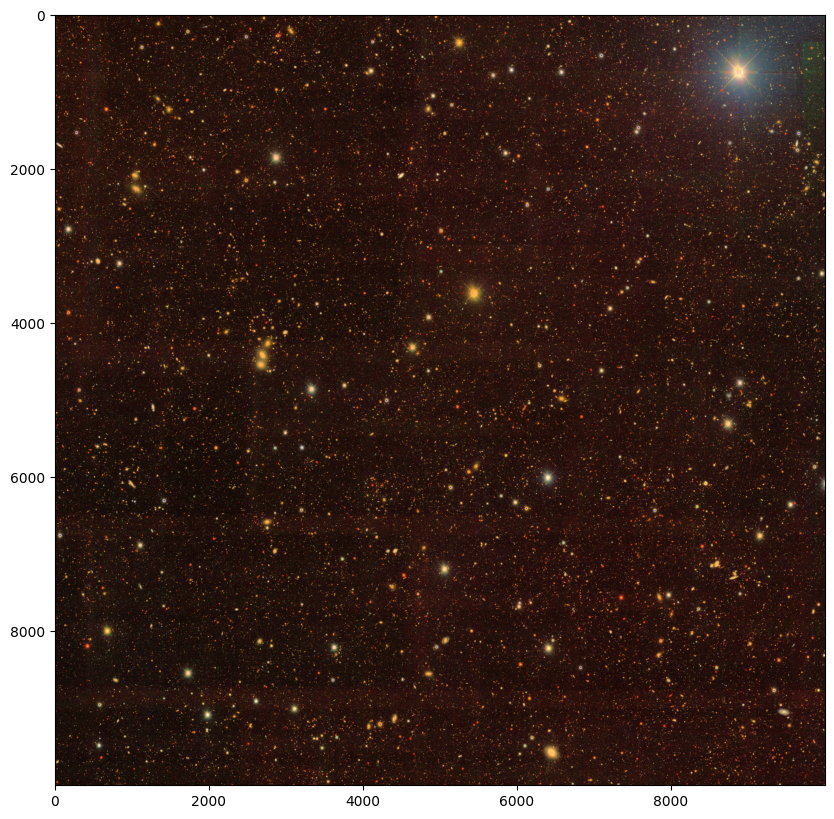

In [8]:
rgb_default = make_lupton_rgb(image_i, image_r, image_g)
plt.figure(figsize=(10,10))
plt.imshow(rgb_default)

In [9]:
main_path = DES_DIR / Path(DES_SUBDIR) / Path(f"{DES_SUBDIR}_dr2_main.fits")
flux_path = DES_DIR / Path(DES_SUBDIR) / Path(f"{DES_SUBDIR}_dr2_flux.fits")
main_data = fits.getdata(main_path)
main_df = pd.DataFrame(main_data)
flux_data = fits.getdata(flux_path)
flux_df = pd.DataFrame(flux_data)
full_df = pd.merge(
    main_df, flux_df, left_on="COADD_OBJECT_ID", right_on="COADD_OBJECT_ID", how="left"
)
full_df

,COADD_OBJECT_ID,TILENAME_x,HPIX_32_x,HPIX_64_x,HPIX_1024_x,HPIX_4096_x,HPIX_16384_x,RA_x,DEC_x,ALPHAWIN_J2000_x,...,WAVG_FLUX_PSF_G_y,WAVG_FLUX_PSF_R_y,WAVG_FLUX_PSF_I_y,WAVG_FLUX_PSF_Z_y,WAVG_FLUX_PSF_Y_y,WAVG_FLUXERR_PSF_G_y,WAVG_FLUXERR_PSF_R_y,WAVG_FLUXERR_PSF_I_y,WAVG_FLUXERR_PSF_Z_y,WAVG_FLUXERR_PSF_Y_y
0,1116571654,DES0053-2041,4184,16738,4285105,68561695,1096987124,13.056454,-20.636724,13.056454,...,683.319519,1034.024658,1074.685059,1274.979126,1788.725464,17.636053,26.291019,29.024097,78.832764,423.940491
1,1116567053,DES0053-2041,4184,16738,4285110,68561763,1096988215,13.056469,-20.591304,13.056469,...,196.368149,197.250748,inf,inf,inf,22.516487,26.343719,-inf,-inf,-inf
2,1116543981,DES0053-2041,4186,16744,4286529,68584467,1097351479,13.056481,-20.351949,13.056481,...,157.072952,264.076660,inf,inf,inf,29.190136,43.607346,-inf,-inf,-inf
3,1116597552,DES0053-2041,4184,16738,4285062,68560998,1096975978,13.056710,-20.901850,13.056710,...,289.712646,487.127411,661.900085,968.955444,inf,16.565157,19.728464,30.193422,148.572327,-inf
4,1116571115,DES0053-2041,4184,16738,4285105,68561695,1096987127,13.056740,-20.631263,13.056740,...,inf,inf,inf,inf,inf,-inf,-inf,-inf,-inf,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68514,1116586837,DES0053-2041,4184,16738,4285016,68560260,1096964163,13.819443,-20.795595,13.819443,...,503.728577,1033.314819,1539.083008,1711.154541,1823.136597,15.880844,18.505005,33.255836,63.121899,302.682404
68515,1116551610,DES0053-2041,4184,16739,4285225,68563608,1097017737,13.819464,-20.432428,13.819464,...,inf,239.209259,inf,inf,inf,-inf,42.199951,-inf,-inf,-inf
68516,1116554525,DES0053-2041,4184,16739,4285224,68563590,1097017445,13.819506,-20.463666,13.819506,...,312.310242,524.127136,665.805786,916.527161,inf,15.840570,17.033678,32.626961,114.220909,-inf
68517,1116556727,DES0053-2041,4184,16739,4285218,68563499,1097015999,13.819511,-20.486442,13.819511,...,inf,inf,inf,inf,inf,-inf,-inf,-inf,-inf,-inf


In [10]:
import numpy as np

In [22]:
np.array(full_df["YWIN_IMAGE_R"])

array([5670.77858421, 6292.53739408, 9569.25629562, ..., 8039.62445911,
       7727.94298518, 4211.53834979])

In [ ]:
fluxes = np.array(
            full_df[
                [
                    "FLUX_AUTO_G_x",
                    "FLUX_AUTO_R_x",
                    "FLUX_AUTO_I_x",
                    "FLUX_AUTO_Z_x",
                    "FLUX_AUTO_Y_x",
                ]
            ]
        )

fluxes *= (fluxes > 0)

hlrs = 0.263 * np.array(full_df["FLUX_RADIUS_R"])
hlrs = 1e-4 + hlrs * (hlrs > 0)

mock_catalog = pd.DataFrame()
mock_catalog["RA"] = np.array(full_df["ALPHAWIN_J2000_x"])
mock_catalog["DEC"] = np.array(full_df["DEC_x"])
mock_catalog["X"] = np.array(full_df["XWIN_IMAGE_R"])
mock_catalog["Y"] = np.array(full_df["YWIN_IMAGE_R"])
mock_catalog["MEM"] = 0
mock_catalog["FLUX_R"] = fluxes[:, 1]
mock_catalog["FLUX_G"] = fluxes[:, 0]
mock_catalog["FLUX_I"] = fluxes[:, 2]
mock_catalog["FLUX_Z"] = fluxes[:, 3]
mock_catalog["FLUX_Y"] = fluxes[:, 4]
mock_catalog["HLR"] = hlr_samples
mock_catalog["FRACDEV"] = 0
mock_catalog["G1"] = g1_size_samples
mock_catalog["G2"] = g2_size_samples
mock_catalog["Z"] = redshift_samples
mock_catalog["SOURCE_TYPE"] = source_types.astype(int)